In [ ]:
#import modules 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint  # this is needed to integrate the differential equation(s)

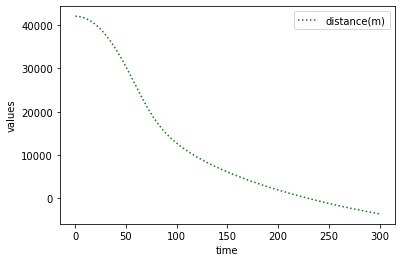

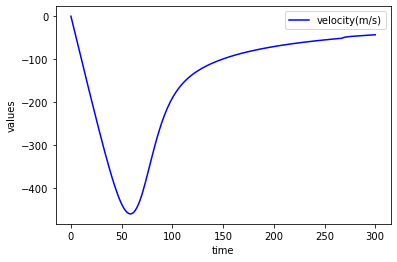

In [53]:
# build the model generates dy/dt
def m(y, t):
    '''
    Args:
        y = is an array containing distance and velocity
         .... with info like this -> y[distance][velocity]
         .... y[0] = distance (height), y[1] = velocity
        t = time at y in seconds
    Returns:
        A tuple with
         ... dydt = differential of distance against time (velocity)
         ... d2ydt2 = differential of velocity against time (acceleration)
    '''
    # free-fall constants
    re = 6371000 # earth's radius in meters
    g0 = 9.8 # in meters/sec
    M = 180 # mass of Alan in Kg
    h = y[0] # height in meters
    v = y[1] # velocity picked from y matrix

    # parachute constants from: [NASA](https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/rktvrecv.html)
    cd = 1.75 # drag coefficient of a typical parachute
    r = 1.229 # typical air density in kg/cu m
    pa = 1950 # typical area of the parachute in sq m
    vd = np.sqrt(2*M/(cd*r*pa)) # velocity for the parachute drag
    para_drag = cd*(r*vd**2)/2*pa/M # parachute drag is divided by M to unitize mass in line with other variables

    ga = g0 * (re/(re+h))**2 # gravitational acceleration

    c = 0.5*np.exp(-h/6450) # co-efficient of air resistance
    ca = -(c/M)*abs(v)*v # air resistance
   
    dydt = y[1] # which is the velocity

    if t <= 4*60+27:  # Step 1: free-fall t <= 4 mins and 27 seconds
        d2ydt2 = - ga + ca
    else: # Step 2: after parachute is deployed
        d2ydt2 = - ga + ca + para_drag
    
    return (dydt, d2ydt2)
        
# initial conditions
x0=42000.0 # initial height
v0=0.0 # initial velocity

y0 = [x0, v0] # initial input for m

# generate timepoints
t = np.linspace(0, 5*60, 200) # For Alan's fall for 5 mins * 60 seconds

# solve ODE
y = odeint(m, y0, t)
h = y[:,0] # distance travelled
v = y[:,1] # velocity

# plot the graph
plt.plot(t, h, 'g:', label = 'distance(m)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

plt.plot(t, v, 'b-', label = 'velocity(m/s)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()
# plt.plot(t, ga, 'k.', label = 'gr accel(m/s)')
# plt.plot(t, ca, 'r--', label = 'air resistance (m/s)')







In [8]:
c = 0.5*np.exp(-41000/6450)
ca = -c/180*abs(-30.0)*-30.0

In [46]:
4*60+27

267

In [47]:
h

array([ 4.20000000e+04,  4.19890095e+04,  4.19560398e+04,  4.19010968e+04,
        4.18241903e+04,  4.17253343e+04,  4.16045475e+04,  4.14618531e+04,
        4.12972801e+04,  4.11108632e+04,  4.09026440e+04,  4.06726714e+04,
        4.04210034e+04,  4.01477073e+04,  3.98528622e+04,  3.95365600e+04,
        3.91989077e+04,  3.88400294e+04,  3.84600696e+04,  3.80591959e+04,
        3.76376025e+04,  3.71955151e+04,  3.67331950e+04,  3.62509451e+04,
        3.57491165e+04,  3.52281152e+04,  3.46884108e+04,  3.41305453e+04,
        3.35551435e+04,  3.29629241e+04,  3.23547112e+04,  3.17314471e+04,
        3.10942048e+04,  3.04442001e+04,  2.97828031e+04,  2.91115468e+04,
        2.84321331e+04,  2.77464341e+04,  2.70564865e+04,  2.63644789e+04,
        2.56727298e+04,  2.49836557e+04,  2.42997289e+04,  2.36234265e+04,
        2.29571722e+04,  2.23032741e+04,  2.16638629e+04,  2.10408350e+04,
        2.04358050e+04,  1.98500713e+04,  1.92845971e+04,  1.87400078e+04,
        1.82166029e+04,  